# Intensity point source mapping

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
!ls -ltr

total 111896
-rw-r--r--   1 pai  staff     67513 20 Oct 12:25 libsearch
-rw-r--r--@  1 pai  staff       858 20 Oct 12:25 quat_rotation.py
-rw-r--r--@  1 pai  staff     17422 20 Oct 12:25 readligo.py
-rw-r--r--@  1 pai  staff       863 20 Oct 16:01 config.py
-rw-r--r--@  1 pai  staff      4737 20 Oct 16:33 OverlapFunctsSrc.py
-rw-r--r--   1 pai  staff     98810 26 Oct 16:50 hp_hc_in_ns16.npz
drwxr-xr-x   5 pai  staff       160 26 Oct 17:03 const_ph_tests
drwxr-xr-x   5 pai  staff       160 26 Oct 17:11 rd_ph_tests
drwxr-xr-x   7 pai  staff       224 26 Oct 18:19 in_equals_out_tests
-rw-r--r--   1 pai  staff   4731872 26 Oct 19:10 map_PC_16_in_ns_4.npz
-rw-r--r--   1 pai  staff    298976 26 Oct 19:59 map_PC_16_in_ns_2.npz
drwxr-xr-x   6 pai  staff       192 29 Oct 07:39 hiell_tests
-rw-r--r--   1 pai  staff    197076  3 Nov 14:51 Galinmap_ns32.npz
-rw-r--r--   1 pai  staff    197298  3 Nov 14:55 GBmap_ns32.npz
-rw-r--r--   1 pai  staff       575  4 Nov 10:59 gal_inmap.py
-rw-r--r--   1 p

# nside_in = 4, nside_out = 4

/Users/pai/miniconda3/lib/python3.8/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


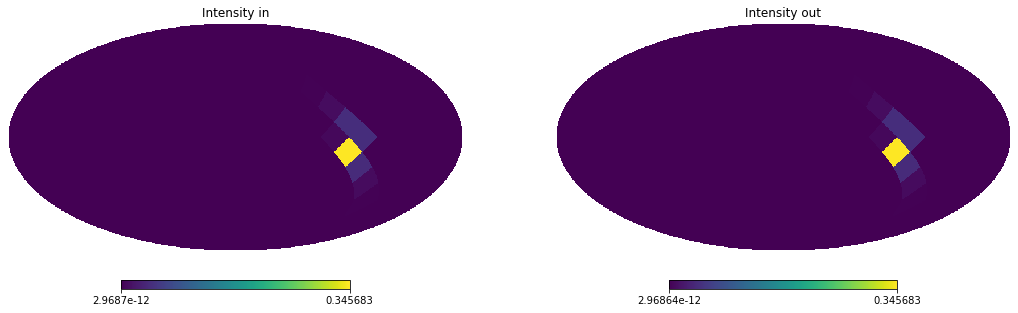

In [2]:
filein = np.load('GB_point_source/hp_hc_in_ns16_GB_np.npz') 
file   = np.load('GB_point_source/Imap_GB_HL_ns_4.npz')

hp_in = filein['hp_in']
hc_in = filein['hc_in']

map_out = file['map']
map_in  = hp_in*np.conj(hp_in) +hc_in*np.conj(hc_in)

fig, (ax1, ax2) = plt.subplots(figsize = (18,10), ncols=2)

plt.axes(ax1)
hp.mollview(hp.ud_grade(map_in, nside_out = 4), hold = True, title = 'Intensity in')
plt.axes(ax2)
hp.mollview(map_out, hold = True, title = 'Intensity out')


# nside_in = 16, nside_out = 8

In [3]:
file    = np.load('Imap_GB_HL_ns_8.npz')
map_out = file['map']

fig, (ax1, ax2) = plt.subplots(figsize = (18,10), ncols=2)

plt.axes(ax1)
hp.mollview(map_in, hold = True, title = 'Intensity in')
plt.axes(ax2)
hp.mollview(map_out, hold = True, title = 'Intensity out')

print(np.mean(map_in), np.mean(map_out))

FileNotFoundError: [Errno 2] No such file or directory: 'Imap_GB_HL_ns_8.npz'

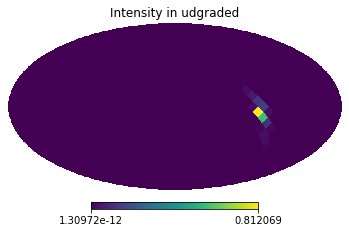

In [4]:
hp.mollview(hp.ud_grade(map_in, nside_out = 8), hold = True, title = 'Intensity in udgraded')

### hence the monopole is conserved, but some of the power is aliased into the surrounding pixels as the signal scale is < pixel scale

# Phase coherent point source mapping

In [5]:
!ls -ltr | tail -10  

-rw-r--r--   1 pai  staff     58844  5 Jan 19:11 Monopole_case.ipynb
-rw-r--r--   1 pai  staff   9462500  6 Jan 10:33 Imap_freq_phase_lm2_HL_ns_8.npz
-rw-r--r--@  1 pai  staff     58017  6 Jan 10:33 out.pdf
-rw-r--r--   1 pai  staff    129549  6 Jan 14:37 unpack_frequency_phase.ipynb
-rw-r--r--   1 pai  staff    242049  6 Jan 15:49 toy example.ipynb
-rw-r--r--   1 pai  staff    499349 26 Jan 14:40 Monopole or spectral reconstructions.ipynb
-rw-r--r--   1 pai  staff     38178 29 Jan 09:49 GB_point_source_coherent_out.pdf
-rw-r--r--   1 pai  staff     59501 29 Jan 09:49 GB_point_source_coherent_I.pdf
-rw-r--r--   1 pai  staff      1442 29 Jan 09:49 GB_point_source_coherent_in.pdf
-rw-r--r--   1 pai  staff    221614 29 Jan 09:50 unpack_point_source.ipynb


/Users/pai/miniconda3/lib/python3.8/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


0.0005815663075992888 (0.0004508286611369821+0j)


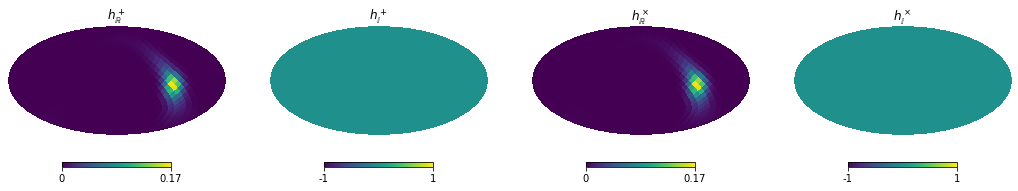

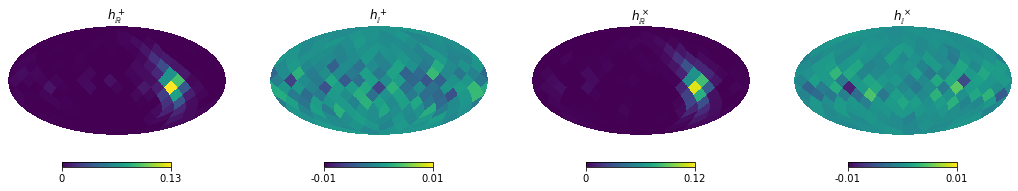

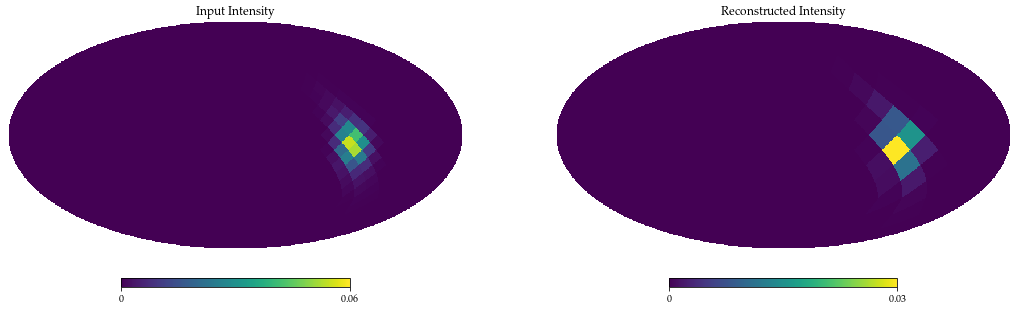

In [6]:
fileGBi1 = np.load('GB_point_source/hp_hc_in_ns16_GB_np_smooth.npz')
fileGBo1 = np.load('GB_point_source/map_GB_np_smoothHL_ns_4.npz')

hp_i1 = hp.ud_grade(fileGBi1['hp_in'], nside_out = 8)
hc_i1 = hp.ud_grade(fileGBi1['hc_in'], nside_out = 8)

hp_o1 = fileGBo1['h_plus']
hc_o1 = fileGBo1['h_cross']
import matplotlib.pyplot as plt

#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)
#plt.title('Coherent point source input')
plt.axes(ax1)
hp.mollview(hp_i1.real, hold = True, min = 0., max = 0.17, title =r"$h^+_{\mathbb{R}}$")
plt.axes(ax2)
hp.mollview(hp_i1.imag, hold = True, title =r"$h^+_{\mathbb{I}}$")
plt.axes(ax3)
hp.mollview(hc_i1.real, hold = True, min = 0., max = 0.17, title =r"$h^\times_{\mathbb{R}}$")
plt.axes(ax4)
hp.mollview(hc_i1.imag, hold = True, title =r"$h^\times_{\mathbb{I}}$")

plt.savefig('GB_point_source_coherent_in.pdf', bbox_inches='tight')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_o1.real, hold = True, min = 0., max = 0.13, title =r"$h^+_{\mathbb{R}}$")
plt.axes(ax2)
hp.mollview(hp_o1.imag, hold = True, min = -0.01, max = 0.01, title =r"$h^+_{\mathbb{I}}$")
plt.axes(ax3)
hp.mollview(hc_o1.real, hold = True, min = 0., max = 0.12, title =r"$h^\times_{\mathbb{R}}$")
plt.axes(ax4)
hp.mollview(hc_o1.imag, hold = True, min = -0.01, max = 0.01, title =r"$h^\times_{\mathbb{I}}$")

plt.savefig('GB_point_source_coherent_out.pdf', bbox_inches='tight')

##

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

fig, (ax1, ax2) = plt.subplots(figsize = (18,10), ncols=2)

plt.axes(ax1)
hp.mollview(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1), hold = True, min = 0, max = 0.06, title = 'Input Intensity')
plt.axes(ax2)
hp.mollview(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1), hold = True, min = 0, max = 0.03, title = 'Reconstructed Intensity')

plt.savefig('GB_point_source_coherent_I.pdf', bbox_inches='tight')

print(np.mean(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1)), np.mean(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1)))

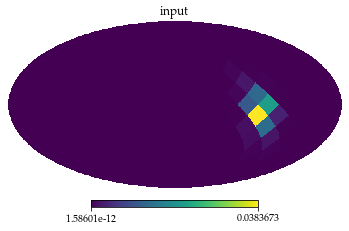

In [7]:
hp.mollview(hp.ud_grade(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1), nside_out = 4), hold = True, title = 'input')

/Users/pai/miniconda3/lib/python3.8/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


(0.0003858257962897544+0j) (0.00024040600509206642+0j)


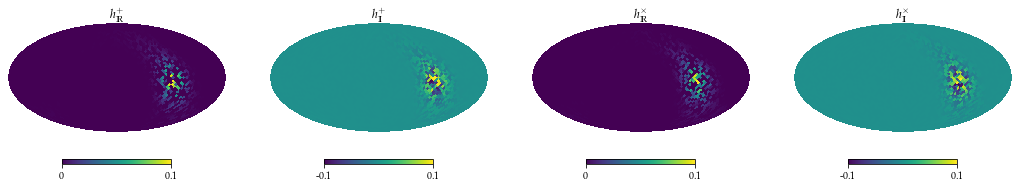

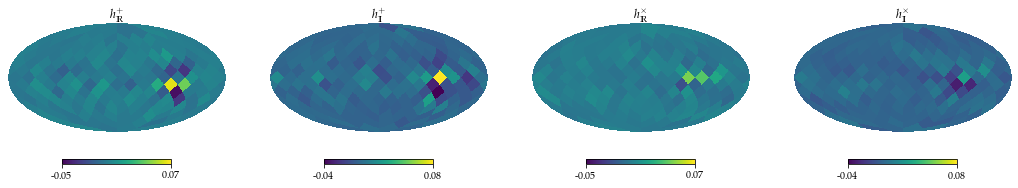

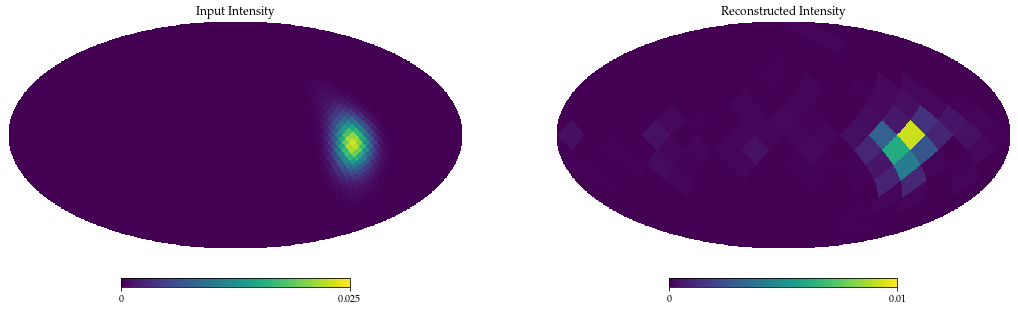

In [22]:
fileGBi1 = np.load('GB_point_source/hp_hc_in_ns16_GB_smooth.npz')
fileGBo1 = np.load('GB_point_source/map_GB_smoothHL_ns_4.npz')

hp_i1 = fileGBi1['hp_in']
hc_i1 = fileGBi1['hc_in']

hp_o1 = fileGBo1['h_plus']
hc_o1 = fileGBo1['h_cross']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_i1.real, hold = True, min = 0., max = 0.1, title =r"$h^+_{\mathbb{R}}$")
plt.axes(ax2)
hp.mollview(hp_i1.imag, hold = True, min = -0.1, max = 0.1, title =r"$h^+_{\mathbb{I}}$")
plt.axes(ax3)
hp.mollview(hc_i1.real, hold = True, min = 0., max = 0.1, title =r"$h^\times_{\mathbb{R}}$")
plt.axes(ax4)
hp.mollview(hc_i1.imag, hold = True, min = -0.1, max = 0.1, title =r"$h^\times_{\mathbb{I}}$")

plt.savefig('GB_point_source_incoherent_in.pdf', bbox_inches='tight')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_o1.real, hold = True,  min = -0.05, max = 0.07, title =r"$h^+_{\mathbb{R}}$")
plt.axes(ax2)
hp.mollview(hp_o1.imag, hold = True,  min = -0.04, max = 0.08, title =r"$h^+_{\mathbb{I}}$")
plt.axes(ax3)
hp.mollview(hc_o1.real, hold = True, min = -0.05, max = 0.07, title =r"$h^\times_{\mathbb{R}}$")
plt.axes(ax4)
hp.mollview(hc_o1.imag, hold = True, min = -0.04, max = 0.08, title =r"$h^\times_{\mathbb{I}}$")

plt.savefig('GB_point_source_incoherent_out.pdf', bbox_inches='tight')

##

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

fig, (ax1, ax2) = plt.subplots(figsize = (18,10), ncols=2)

plt.axes(ax1)
hp.mollview(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1), hold = True, min = 0,  max = 0.025, title = 'Input Intensity')
plt.axes(ax2)
hp.mollview(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1), hold = True, min = 0,  max = 0.01, title = 'Reconstructed Intensity')

plt.savefig('GB_point_source_incoherent_I.pdf', bbox_inches='tight')

print(np.mean(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1)), np.mean(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1)))

(0.0026712460420498345+0j) (0.0012020176718586617+0j) (0.0010174253372055408+0j)


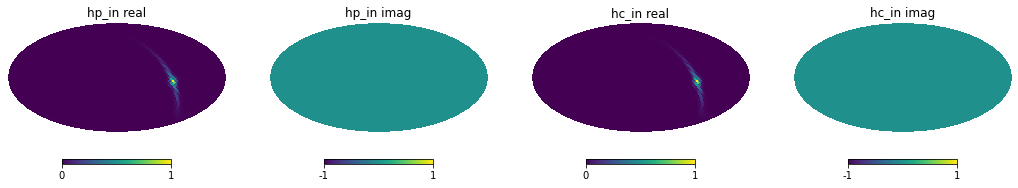

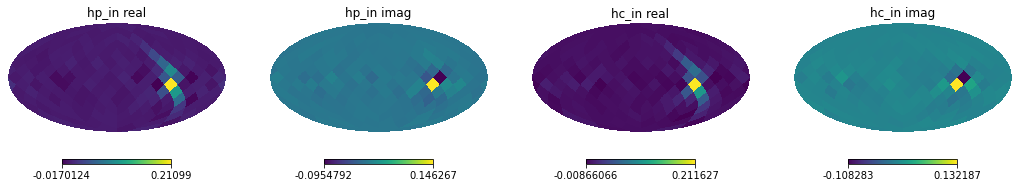

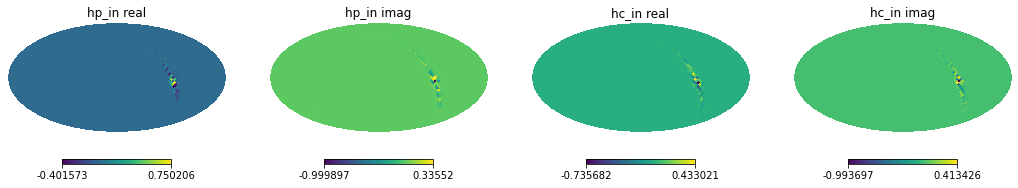

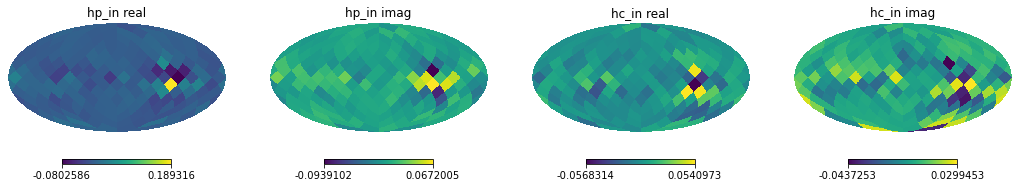

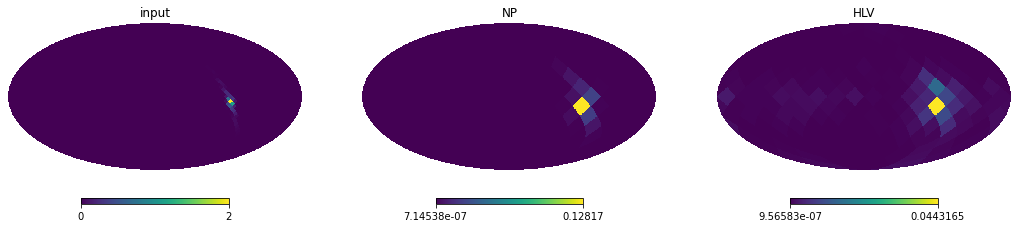

In [47]:
fileGBi1 = np.load('hp_hc_in_ns16_GB_np.npz')
fileGBi2 = np.load('hp_hc_in_ns16_GB.npz')
fileGBo1 = np.load('map_GB_npHLV_ns_4.npz') 
fileGBo2 = np.load('map_GBHLV_ns_4.npz')

hp_i1 = fileGBi1['hp_in']
hc_i1 = fileGBi1['hc_in']

hp_i2 = fileGBi2['hp_in']
hc_i2 = fileGBi2['hc_in']

hp_o1 = fileGBo1['h_plus']
hc_o1 = fileGBo1['h_cross']

hp_o2 = fileGBo2['h_plus']
hc_o2 = fileGBo2['h_cross']


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_i1.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_i1.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_i1.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_i1.imag, hold = True, title ="hc_in imag")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_o1.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_o1.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_o1.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_o1.imag, hold = True, title ="hc_in imag")


##


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_i2.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_i2.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_i2.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_i2.imag, hold = True, title ="hc_in imag")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_o2.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_o2.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_o2.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_o2.imag, hold = True, title ="hc_in imag")



fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18,10), ncols=3)

plt.axes(ax1)
hp.mollview(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1), hold = True, title = 'input')
plt.axes(ax2)
hp.mollview(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1), hold = True, title = 'NP')
plt.axes(ax3)
hp.mollview(hp_o2*np.conj(hp_o2) +hc_o2*np.conj(hc_o2), hold = True, title = 'HLV')


mapin1 = hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1)
mapou1 = hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1)
mapou2 = hp_o2*np.conj(hp_o2) +hc_o2*np.conj(hc_o2)

print(np.mean(mapin1), np.mean(mapou1), np.mean(mapou2))